### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**Independent variable is congruent and incongruent conditions. 
Dependent variable is time to complete the test.**

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null hypothesis is that on average it takes the same time to complete test under incongruent words condition as congruent words condition. Alternative hypothesis is that on average it takes longer to complete the test under incongruent words condition than congruent words condition.

$$H_0: \mu_1 = \mu_2$$
$$H_1: \mu_1 > \mu_2$$

$\mu_1$ represents population mean of incongruent values

$\mu_2$ represents population mean of congruent values


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.shape

(24, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [4]:
#Calculate mean of the population
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [14]:
#Calculate difference between congruent and incongruent conditions and create a field:
df['diff'] = df['Incongruent'] - df['Congruent']

In [15]:
#Calculate mean of difference: 
df['diff'].mean()

7.9647916666666658

In [17]:
#Calculate standard deviation of the difference:
df['diff'].std(axis=0)

4.8648269103590556

**Dataset contains two columns, one column containing time to complete under congruent condition and the other containing time to complete under incongruent condition. Data contains 24 test data variations. Mean time to complete under congruent condition is 14 seconds and under incongruent is 22 seconds. On average it takes 8 seconds longer to complete test under incongruent condition than to complete test under congruent condition. Standard deviation of difference is ~4.7 seconds.** 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

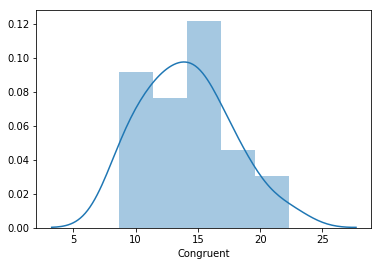

In [20]:
# Build the visualizations here
import matplotlib.pyplot as plt
import seaborn as sns

#First lets take a look at histogram of congruent condition test results
sns.distplot(df['Congruent'])


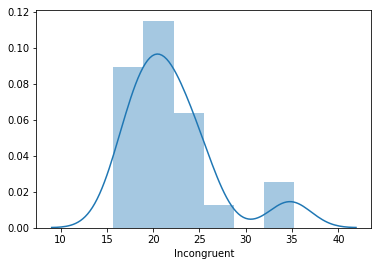

In [19]:
#Now lets take a look at histogram of incongruent condition test results
sns.distplot(df['Incongruent'])


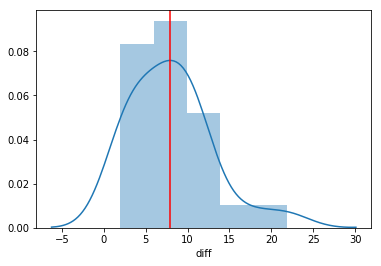

In [21]:
#We also want to look at the distribution of difference between congruent and incongruent condition times. 
sns.distplot(df['diff'])

diff_mean = df['diff'].mean()
plt.axvline(diff_mean, c='red');

**Based on the histograms above, congruent sample results look normally distributed ranging from around 8 to 22 seconds, while incongruent sample test results have wider range from 15 to 25 seconds. Mean of incongruent sample test results come around 20. I also plotted distribution of differences between congruent and incongruent condition times. The distribution appears normal with the mean falling somewhere around 7-8.** 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

**I will be performing paired-samples t test (also called dependent sample t test) because we have two samples and each individual taking the test is in both samples.**

**Assumptions:**
There are only 24 observations available and we are not aware of statistics for the whole population. Below analysis is based on those 24 individual test results. Therefore, we should be careful about our conclusions as full population might have different standard deviation than the one provided here. 

**Confidence level = 95%. Type I error is when null hypothesis is true but is rejected.**

In [22]:
np.percentile(df['diff'], 2.5), np.percentile(df['diff'], 97.5) 

(2.0914499999999987, 19.122200000000007)

**Using confidence level of 95%, we see that the difference in time between incongruent and congruent conditions lies within the range from 2 seconds and 19 seconds. These range would indicate that null hypothesis is true.**

With paired-sample t-test we take the differences in congruent and incongruent sample results. Then we treat the result as one-sample t-test. We have already calculated the mean of the differences and standard deviation in section 3 above. Just to remind, our sample differences has a mean of 7.964792 and standard deviation of 4.864827. 

Since we have a sample of small size and do not know the standard deviation of the population, we will use a one-sample t-test. According to the null hypothesis, there is no difference between congruent and incongruent condition results; that is, the mean difference score is 0. So the mean of the comparison distribution is always 0. 

The formula for the t-statistic T for a one-sample test is as follows:

t-stat = (mean(a) - mean(b)) / (standard_deviation(a - b)/square_root(N))

where “a” and “b” are the measurements for each condition and "N" is the sample size.

$$t = \dfrac{7.964792}{4.864827/{\sqrt {24}}}$$

Therefore, t-statistic is 8.02

$$p-value = P(|T| =< t;H_0) = P(T(23) =< 8.02)$$

The Student's distribution gives T(23)=1.714 at probabilities 0.95 and degrees of freedom 23. Source: https://en.wikipedia.org/wiki/Student%27s_t-distribution

Calculated p-value is .00001. Source: https://www.socscistatistics.com/pvalues/tdistribution.aspx

p-value < 0.05. Therefore, we reject the null hypothesis.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Sources: 
https://en.wikipedia.org/wiki/Stroop_effect